<a href="https://colab.research.google.com/github/nieyangfei/EGG_Big_Data/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Time Series Definitions and Correlation

In [3]:
sample_cov <- function(x, k = 0) {
  stopifnot(k >= 0, k < length(x))

  x_bar <- mean(x)
  x_t <- x[1:(length(x) - k)]
  x_tk <- x[(1 + k):length(x)]

  # matches formula for C_k
  Ck <- (1 / length(x)) * sum((x_t - x_bar) * (x_tk - x_bar))

  return(Ck)
}

s <- 1:5
sample_cov(s)
sample_cov(s, 1)

sample_auto_cor <- function(x, k) {
  ck <- sample_cov(x, k)
  c0 <- sample_cov(x, 0)
  rk <- ck / c0

  print(ck)
  print(c0)

  return(rk)
}

sample_auto_cor(s, 1)


[1] 2

[1] 0.8

[1] 0.8
[1] 2


[1] 0.4

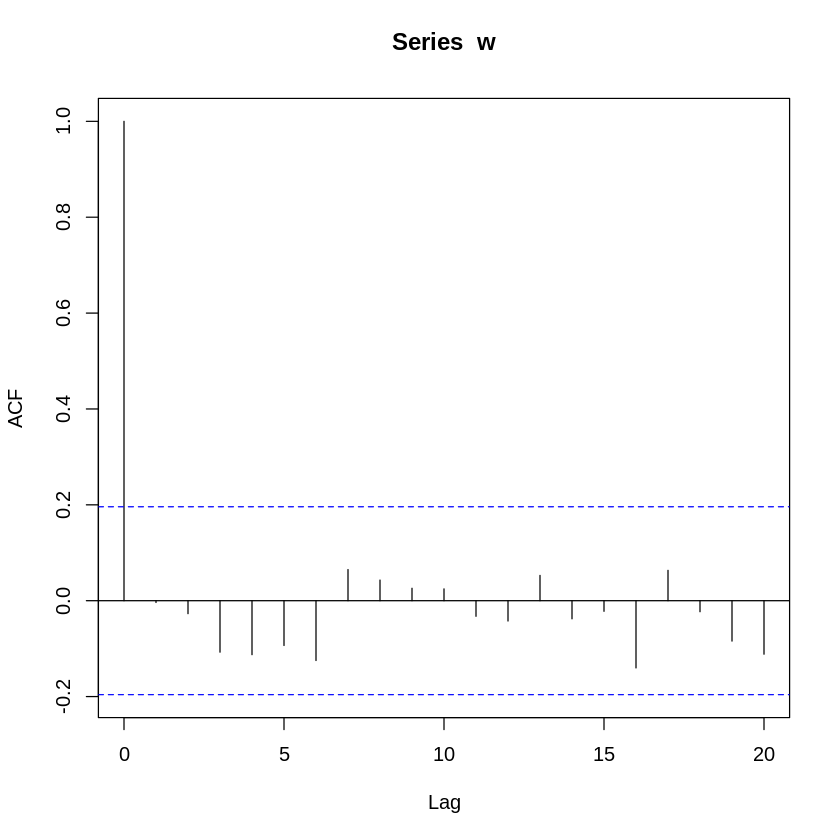

In [4]:
set.seed(1)
w <- rnorm(100)
acf(w)

# Task 2: Autoregressive (AR) Models

 num [1:100] -0.626 -0.192 -0.951 1.025 0.944 ...


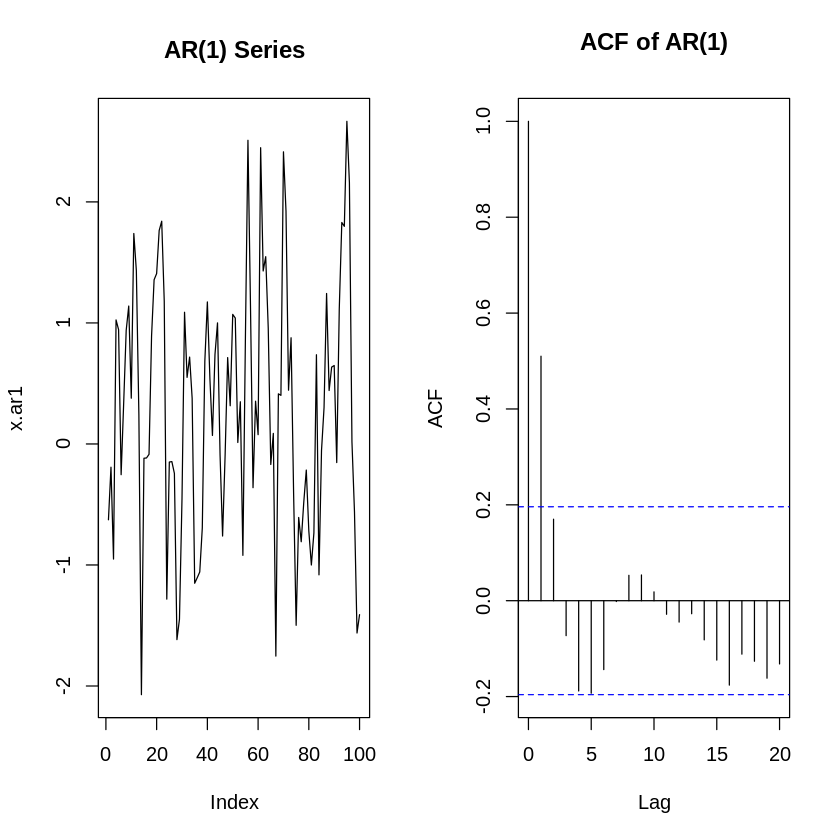

In [5]:
suppressWarnings({
set.seed(1)
x.ar1 <- w <- rnorm(100)
for (t in 2:100) {
x.ar1[t] <- 0.6 * x.ar1[t - 1] + w[t]
}
str(x.ar1)
})
par(mfrow = c(1, 2))
plot(x.ar1, type = "l", main = "AR(1) Series")
acf(x.ar1, main = "ACF of AR(1)")


In [6]:
fit.x.ar1 <- ar(x.ar1, method = "mle")
# Selected order
fit.x.ar1$order
# Estimated alpha(s)
fit.x.ar1$ar

[1] 1

[1] 0.5231187

 num [1:100] -0.626 0.184 -0.505 1.198 1.295 ...


Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
“possible convergence problem: optim gave code = 1”


[1] 2

[1]  0.6961005 -0.3946280

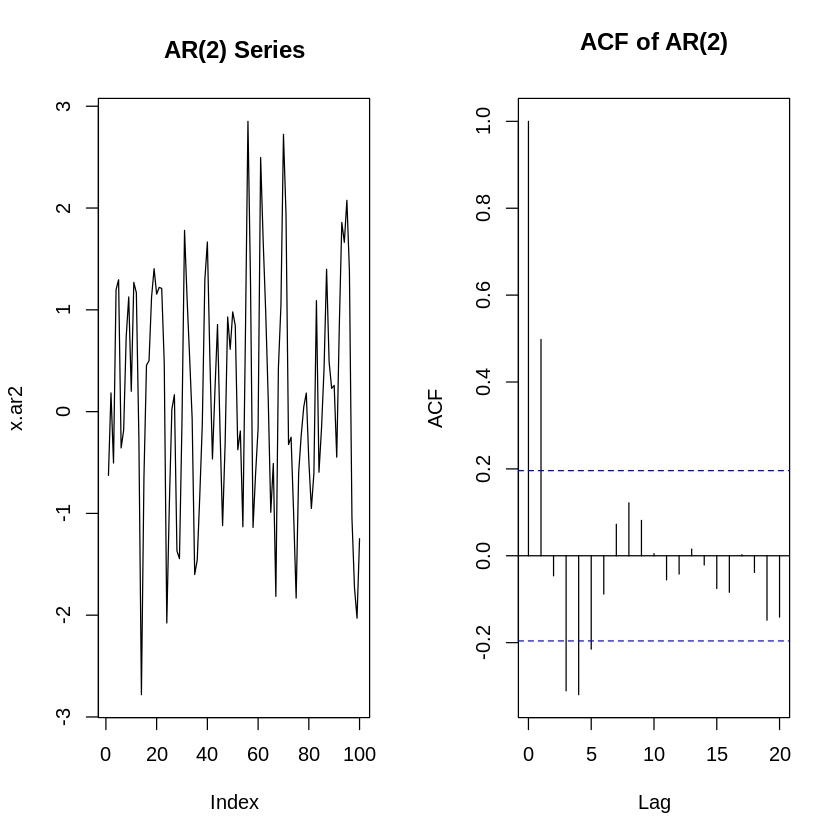

In [7]:
set.seed(1)
x.ar2 <- w <- rnorm(100)
for (t in 3:100) {
x.ar2[t] <- 0.666 * x.ar2[t - 1] - 0.333 * x.ar2[t - 2] + w[t]
}
str(x.ar2)
par(mfrow = c(1, 2))
plot(x.ar2, type = "l", main = "AR(2) Series")
acf(x.ar2, main = "ACF of AR(2)")
fit.x.ar2 <- ar(x.ar2, method = "mle")
fit.x.ar2$order
fit.x.ar2$ar


Loading required package: quantmod

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘quantmod’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "GSPC"

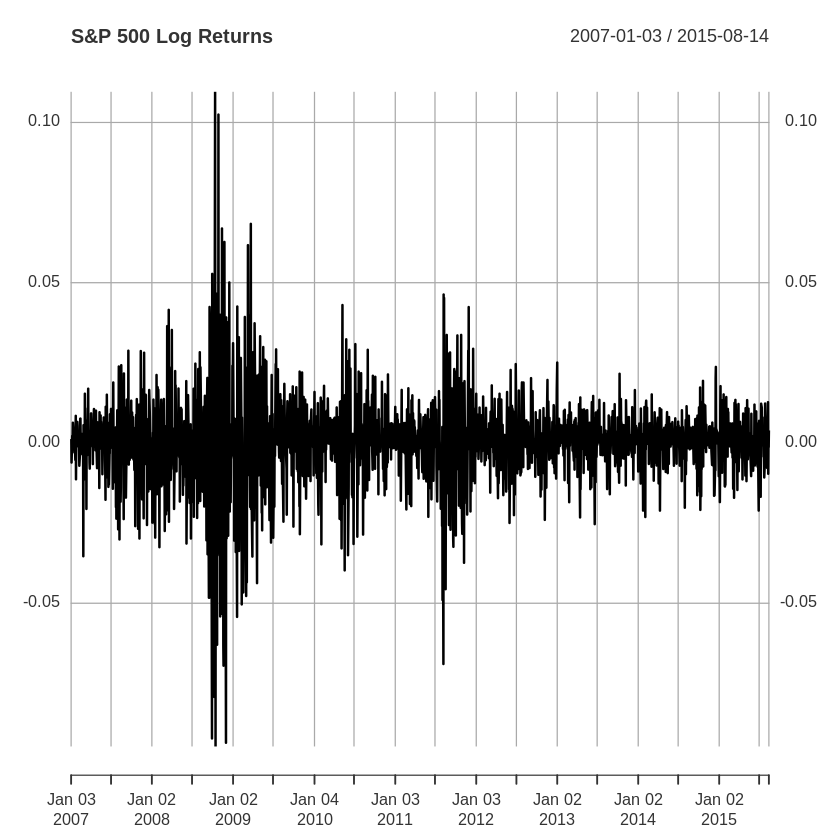

[1] 22

[1] -0.111818253 -0.060148584  0.018789856 -0.025622146 -0.046388768
 [6]  0.002262879 -0.030085900  0.030431096 -0.007621952  0.044259929
[11] -0.018927042  0.032752696 -0.001074486 -0.042889866 -0.039714587
[16]  0.052341754  0.016551265 -0.067497212  0.007071347  0.035725427
[21] -0.035421351  0.031323917

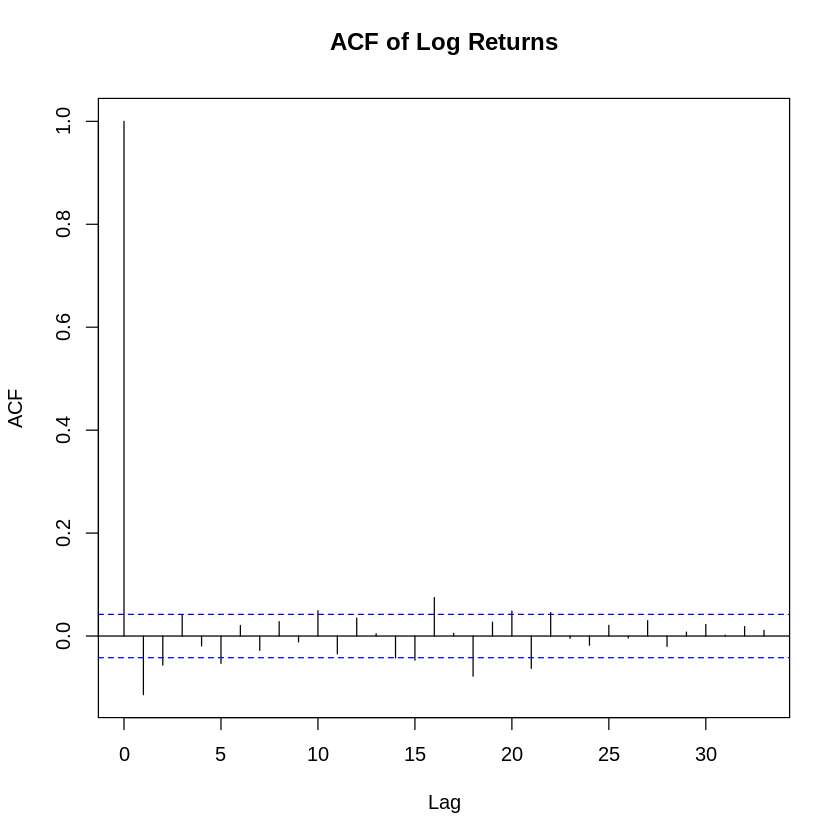

In [8]:
if (!require(quantmod)) install.packages("quantmod")
library(quantmod)
getSymbols("^GSPC")
GSPC <- GSPC[1:2170] # subset for speed in lab
# Log returns (stationarity-friendly)
gspcrt <- diff(log(Cl(GSPC)))
plot(gspcrt, main = "S&P 500 Log Returns")
# Correlogram of returns
acf(gspcrt, na.action = na.omit, main = "ACF of Log Returns")
gspcrt <- na.omit(gspcrt)
# Fit AR model (Yule-Walker is fast and common for AR)
gspcrt.ar <- ar(gspcrt, method = "yule-walker")
# Check order and parameters
gspcrt.ar$order
gspcrt.ar$ar